**Project Introduction**

Our project focuses around how different music affects the mood of different listeners. The data set that we have chosen tracks the mood of listeners for various different songs. It also keeps track of other details and features of the songs, such as length, tempo, key, time signature, and popularity. Our group aims to find which of these key characteristics can best determine whether or not a listener will experience a positive or negative mood in response. With the data we can also see temporal trends, and perhaps see if there are any time periods that caused a change in trend for music mood and how they correlate to the events going on in the world.

Link to github repo for the progress report: https://github.com/uic-ds-fall-2023/class-project-next-level-analytics/blob/main/prog-report.ipynb

The dataset has the following columns:
- name
- album
- artist
- id
- release date
- popularity
- length
- danceability
- acousticness
- energy
- instrumentalness
- liveness
- valence
- loudness
- speechiness
- tempo
- key
- time signature
- mood

Any changes: After speaking with the professor, we decided to use a publicly available dataset that has much more data points that we are able to study. The link to the dataset can be found here: https://www.kaggle.com/datasets/musicblogger/spotify-music-data-to-identify-the-moods/data

Due to the change in the dataset that we are using, we have slightly altered the domain questions/hypotheses and scope of our initial project idea that we were aiming to explore and answer. We are now more focused on how key features of the songs that we are listening can impact the mood, such as key and time signature, rather than something as broad as using a song's genre, time spent listening to music, and age range to dictate these outcomes.

**Data Cleaning**

In [9]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, metrics

In [10]:
# read in the data file
music_data = pd.read_csv('data_moods.csv')

# clean data to include specific columns, exclude subjective columns such as "danceability"
music_data = music_data[['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'tempo', 'key', 'time_signature', 'mood']]

# now remove any rows with n/a values
music_data = music_data.dropna()

# display the first five entries
music_data.head()

,name,album,artist,id,release_date,popularity,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,169.881,1,4,Energetic


**Exploratory Data Analysis**

**(Nicole and Mahalaxmi)**
Include any interesting issues or preliminary conclusions
you have about your data

In [11]:
print("Descriptive Statistics of the Music Data: ")
print(music_data.describe())
print()
print("The average tempo across all songs: ")
print(music_data['tempo'].mean())
print()
print("Average tempo of happy songs:")
happy_songs = music_data[music_data['mood'] == 'Happy']
print(happy_songs['tempo'].mean())
print()
print("Average popularity of happy songs: ")
print(happy_songs['popularity'].mean())
print()
print("Average tempo of sad songs:")
sad_songs = music_data[music_data['mood'] == 'Sad']
print(sad_songs['tempo'].mean())
print()
print("Average popularity of sad songs: ")
print(sad_songs['popularity'].mean())
print()
print("Grouping of years and count of the moods present for that year: ")
data = pd.to_datetime(music_data['release_date'], errors='coerce', utc=True).dt.strftime('%Y')
music_data['year'] = data
music_data.groupby(['year', 'mood'])['mood'].count()

Descriptive Statistics of the Music Data: 
       popularity       tempo         key  time_signature
count  686.000000  686.000000  686.000000      686.000000
mean    41.534985  119.134679    5.335277        3.870262
std     23.045707   28.978685    3.550858        0.500297
min      0.000000   50.960000    0.000000        1.000000
25%     30.000000   99.008750    2.000000        4.000000
50%     47.000000  120.071000    6.000000        4.000000
75%     57.000000  132.953250    9.000000        4.000000
max     88.000000  217.950000   11.000000        5.000000

The average tempo across all songs: 
119.13467930029152

Average tempo of happy songs:
124.21367857142857

Average popularity of happy songs: 
48.58571428571429

Average tempo of sad songs:
115.5997461928934

Average popularity of sad songs: 
37.73096446700507

Grouping of years and count of the moods present for that year: 


year  mood     
1963  Happy          1
1969  Happy          3
1972  Happy          3
1973  Happy          2
1975  Happy          1
                  ... 
2019  Sad           45
2020  Calm         114
      Energetic      1
      Happy          2
      Sad           33
Name: mood, Length: 95, dtype: int64

**Visualizations**

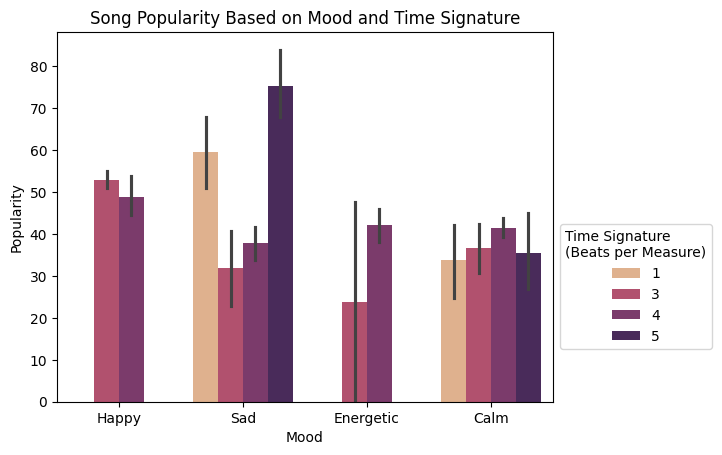

In [12]:
# visualization 1
# barchart for comparison between moods and popularity with time signature hue
ax = sns.barplot(data = music_data, x = 'mood', y ='popularity', hue = 'time_signature', palette = 'flare')
ax.set(ylabel = "Popularity", xlabel = 'Mood', title = "Song Popularity Based on Mood and Time Signature")
plt.legend(title = 'Time Signature\n(Beats per Measure)', bbox_to_anchor = (1, 0.50), loc = 'upper left')

Description: The visualization above shows a barchart detailing the popularity of different moods. There is an added factor of showing the time ssignature of these songs as well. We can see that for calm or happy music, the time signature does not make too much of an impact on how popular those songs end up being. 

We can see that for energetic music, there are no songs with the time signature of 1 or 5. This can lead us to comclude that a consistent and relatively faster time signature is key to music being categorized as "energetic". The same can be said for happy music. We can explore the data further and see if happy and energetic music falls under some sort of "formula" - we can see if other factors of the song such as tempo follow similar guidelines. 

Sad and calm music have more variability in their time signature, and it is clear from the visualization that sad music has the most. Sad songs trend more towards the edges of the time signature domain, most songs either having a time signature of 1 or 5. 

**(Nicole)**
Explain Interesting Hypothesis Considered Here

Explanation about why you thought this was an interesting hypothesis to investigate

Explain Interesting Trends Graph Has

Text(0.5, 1.0, 'Tempo Dictated By Different Moods')

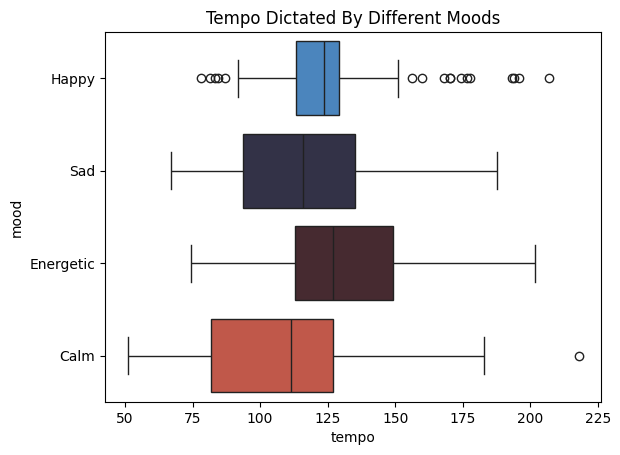

In [13]:
# visualization 2
# boxplot for comparison between tempo of the music and moods
sns.boxplot(data = music_data, x = 'tempo', y = 'mood', hue = 'mood', palette = 'icefire').set_title('Tempo Dictated By Different Moods')

**(Mahalaxmi)**
Explain Interesting Hypothesis Considered Here

Explanation about why you thought this was an interesting hypothesis to investigate

Explain Interesting Trends Graph Has

In [14]:
# visualization 3 (1 More Unique Graph, Darlene)

# Suggestion: Maybe graph something connecting
# date such as year and tempo/popularity to
# moods -> maybe try scatterplot with year on
# x-axis and y-axis have popularity or tempo
# with hue as the 4 moods
#hello
#hi world

**(Darlene)**
Explain Interesting Hypothesis Considered Here

Explanation about why you thought this was an interesting hypothesis to investigate

Explain Interesting Trends Graph Has

**Machine Learning Analysis**

In [15]:
# Machine Learning Analysis 1 (Shreya)
# Determine the mood of the song(happy/sad/energetic/calm) based on tempo

# Split test and train data
X = music_data['popularity']
y = music_data['mood']

X_train = X[:620]
X_test = X[620:]

y_train = y[:620]
y_test = y[620:]

# Baseline comparision
freq_dict = {}

for i in y:
  freq_dict.setdefault(i, 0)
  freq_dict[i] += 1

max_freq = max(freq_dict.values())
max_freq_lst = []

for k, v in freq_dict.items():
  if v == max_freq:
    max_freq_lst.append(k)

mode = max_freq_lst[0]

labels = [mode] * X.shape[0]

correct_pred_cnt = 0

for i in range(len(labels)):
  if labels[i] == y[i]:
    correct_pred_cnt += 1

training_accuracy = correct_pred_cnt/len(y)
print("Training accuracy for baseline is ", training_accuracy)

# Actual model

clf = svm.SVC(gamma = 'scale', kernel = 'rbf')
clf.fit(X_train.array.reshape(-1, 1), y_train.array)

y_pred = clf.predict(X_test.array.reshape(-1,1))
accuracy = metrics.accuracy_score(y_test.array, y_pred)
print("Training accuracy for svm is ", accuracy)

Training accuracy for baseline is  0.28717201166180756
Training accuracy for svm is  0.45454545454545453


**(Shreya)**
Obtained Result Interpretation

In [16]:
# Machine Learning Analysis 2 (Neelu)
# Provide Baseline comparison

**(Neelu)**
Obtained Result Interpretation

**Reflection**

**(Mahalaxmi)**
What is the hardest part of the project that you’ve encountered so far?

**(Mahalaxmi)**
What are your initial insights?

**(Darlene)**
Are there any concrete results you can show at this point? If not, why not?

**(Darlene)**
Going forward, what are the current biggest problems you’re facing?

**(Shreya)**
Do you think you are on track with your project? If not, what parts do you need to
dedicate more time to?

**(Shreya)**
Given your initial exploration of the data, is it worth proceeding with your project,
why?

**(Neelu)**
If not, how are you going to change your project and why do you think it’s
better than your current results?

**Next Steps**

**(Neelu)**
What you plan to accomplish in the next month and how you plan to
evaluate whether your project achieved the goals you set for it.